# Tutorial for the MSTM-wrapper python package

Copyright 2016, Annie Stephenson, Victoria Hwang, Vinothan Manoharan

This file is part of the MSTM-wrapper python package.

This package is free software: you can redistribute it and/or modify it under the terms of the GNU General Public License as published by the Free Software Foundation, either version 3 of the License, or (at your option) any later version.

This package is distributed in the hope that it will be useful, but WITHOUT ANY WARRANTY; without even the implied warranty of MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE. See the GNU General Public License for more details.

You should have received a copy of the GNU General Public License along with this package. If not, see http://www.gnu.org/licenses/.

# Loading and using the package

To load, make sure you are in the top directory and do

In [10]:
import mstm

This will populate the mstm namespace with a few functions and classes that make calculations with mstm more straightforward.

Now take care of the rest of your imports.

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Calculating the reflectance spectrum at a fixed orientation

let us run through the example of two water spheres, n = 1.33, in a silica matrix, n = 1.54, both with radius 125 nm

First, we define the wavelengths and scattering angles of interest

In [12]:
wavelength = 0.4, 0.7, 20
theta = np.linspace(0, 180, 181)
phi = None

next, we define a target object, which contains information about the object of which we want to calculate the reflectance

In [13]:
xpos = [0,1]
ypos = [0,0]
zpos = [0,0]
radii = [0.125, 0.125]
n_matrix = 1.54
n_spheres = 1.33

target = mstm.Target(xpos, ypos, zpos, radii, n_matrix, n_spheres)

Now we define an mstm calculation object. This object contains the input parameters and methods for running an mstm calculation

In [14]:
calculation = mstm.MSTMCalculation(target, wavelength, theta, phi=None)
result = calculation.run()

by running the calculation, we have created an MSTMResult object. We can now use this as input to functions in the MSTMResult class that calculate physical quantities.

Here, we will calculate the reflectance assuming unpolarized incident light (stokes vector is 1,0,0,0)

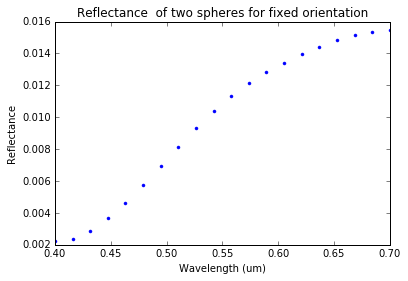

In [24]:
reflectance = result.calc_reflectance(np.array([1, 0, 0, 0]))

plt.plot(result.wavelength, reflectance, '.')
plt.xlabel('Wavelength (um)')
plt.ylabel('Reflectance')
plt.title('Reflectance  of two spheres for fixed orientation')

# Calculating the reflectance spectrum at a random orientation

now let us run through the example of two water spheres, n = 1.33, in a silica matrix, n = 1.54, both with radius 125 nm, but this time we will find a reflectance equivalent to averaging the reflectance over random orientations of the sphere assembly. This technique is useful for correcting for finite size effects in calculating relectances of amorphous materials. 

we use the same target object as above, but make a small change to the calculation obeject. The parameter 'fixed' is automatically set to True, but now we must change it to False, meaning our assembly is not fixed.

In [18]:
calculation = mstm.MSTMCalculation(target, wavelength, theta, phi=None, fixed = False)
result = calculation.run()

we can now calculate the reflectance in the same way as the fixed example

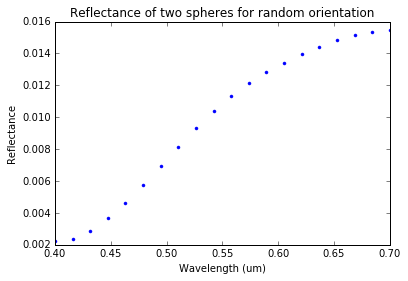

In [23]:
reflectance = result.calc_reflectance(np.array([1, 0, 0, 0]))

plt.plot(result.wavelength, reflectance, '.')
plt.xlabel('Wavelength (um)')
plt.ylabel('Reflectance')
plt.title('Reflectance of two spheres for random orientation')

In this case, the reflectances for fixed and random orientation look pretty much the same, but as we add more spheres, we tend to see that the reflectance spectrum looks more smoothed out for random orientation than for the the fixed orientation calculation.

# Development

Here are some tips for contributing code to the package:
1. Make sure that your code works in Python 3. You should write print(x) instead of print x, and you should check that any imported package is compatible with Python 3.
2. Wrap lines at 79 characters. Use 4 spaces for each indent, and don't use tabs.
3. Write docstrings for all modules, functions, and classes. We use the numpy docstring standards.
4. Write tests for any module you develop and for any changes or additions you make to existing modules. We use the nose testing framework. To run the tests, open a shell, go the to top-level directory (above the directory called "structcol"), and run nosetests.
5. Follow the PEP 8 style guide for naming functions, classes, and modules.
6. If you contribute code to an existing file, add your name to the Copyright notice in the header. Add another year if necessary (for example, if the notice says "Copyright 2015, A. Name" and the year is now 2016, amend the notice to read "Copyright 2015, 2016, A. Name and Your Name")
7. If you contribute a new file, add the GPL copyright notice to the header (see other files in the package for examples) and put your name and the current year in the Copyright notice.
8. Keep all proprietary information and non-open-source code out of the package, and make sure to cite sources for any calculation methods or dispersion formulas.